# Project 032018

#### We process the data sets to understand some activites about steps and vmu

In [1]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as snb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

In [4]:
import datetime
from dateutil.parser import parse

# Load and Overview the Data

In [5]:
# dateparse = lambda dates: [pd.datetime.strptime(d, '%d%M%y:%H:%M:%S') for d in dates]
actiGraph_df = pd.read_csv("ActiGraph Minute Dataset.csv", parse_dates=['Datetime'])

In [6]:
actiGraph_df['Datetime'] = actiGraph_df['ACTDT'] + " " + actiGraph_df['Time']

In [7]:
actiGraph_df.head()

,Uid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,1,06/22/2016 9:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,1,06/22/2016 9:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,1,06/22/2016 9:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,1,06/22/2016 9:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,1,06/22/2016 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


In [8]:
actiGraph_df.shape

(5886177, 17)

In [9]:
actiGraph_df.columns

Index(['Uid', 'Datetime', 'ACTDT', 'Day', 'Week', 'Time', 'Hour', 'Minute',
       'Steps', 'Lux', 'YCnt', 'XCnt', 'ZCnt', 'Calories', 'VMU', 'Wear',
       'WearSens'],
      dtype='object')

### Convert the Datetime String to Datetime Objects

In [10]:
dateparse = lambda d: parse(d)
actiGraph_df['Datetime'] = actiGraph_df['Datetime'].apply(dateparse)

In [11]:
actiGraph_df["Datetime"][0:3]

0   2016-06-22 09:56:00
1   2016-06-22 09:57:00
2   2016-06-22 09:58:00
Name: Datetime, dtype: datetime64[ns]

# How a Record Looks Like

In [12]:
actiGraph_df.iloc[0, :]

Uid                           1
Datetime    2016-06-22 09:56:00
ACTDT                06/22/2016
Day                           1
Week                          1
Time                    9:56:00
Hour                          9
Minute                       56
Steps                         0
Lux                         NaN
YCnt                          0
XCnt                          0
ZCnt                          0
Calories                      0
VMU                           0
Wear                       True
WearSens                      3
Name: 0, dtype: object

In [15]:
print("The total number of patients:")
len(actiGraph_df['Uid'].unique())

The total number of patients:


183

# Take a Look at One Patient's Data

In [16]:
pt_df = actiGraph_df[actiGraph_df['Uid'] == actiGraph_df.iloc[0].loc['Uid']]

In [17]:
pt_df.shape

(31740, 17)

In [18]:
pt_df.head()

,Uid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
0,1,2016-06-22 09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
1,1,2016-06-22 09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2,1,2016-06-22 09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
3,1,2016-06-22 09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
4,1,2016-06-22 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


## Plot the Entire Steps for the Patient

In [19]:
Steps = go.Scatter(
    x=pt_df.Datetime, 
    y=pt_df.Steps,
    name = "Steps",
    hoveron = pt_df.XCnt,
    showlegend = True
)

xaxis_show = dict(
    title = "Time",
    showline = True
)
yaxis_show = dict(
    title = "Steps",
    showline = True
)
layout = dict(title = 'Steps for a Patient',
              hovermode= 'closest',
              xaxis = xaxis_show,
              yaxis = yaxis_show
             )
data =[Steps]

In [20]:
fig = dict(data=data, layout=layout)
py.iplot(fig)

## Plot the Entire VMU for the Patient

In [21]:
VMU = go.Scatter(
    x=pt_df.Datetime, 
    y=pt_df.Steps,
    name = "VMU",
    hoveron = pt_df.XCnt,
    showlegend = True
)

xaxis_show = dict(
    title = "Time",
    showline = True
)
yaxis_show = dict(
    title = "VMU",
    showline = True
)
layout = dict(title = 'VMU for a Patient',
              hovermode= 'closest',
              xaxis = xaxis_show,
              yaxis = yaxis_show
             )
data =[VMU]

In [22]:
fig = dict(data=data, layout=layout)
py.iplot(fig)

## Plot the Steps for Different WearSens Values

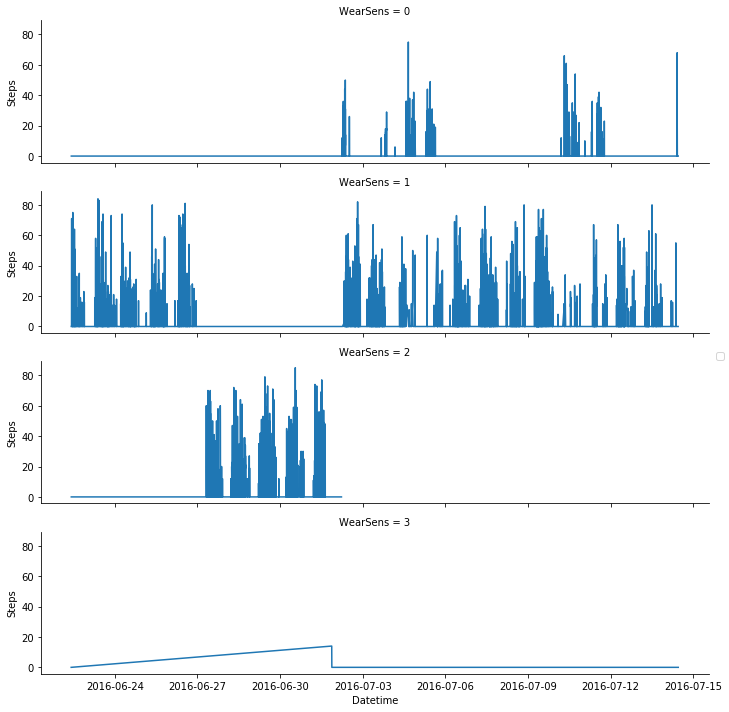

In [23]:
grid = snb.FacetGrid(pt_df, row='WearSens', size = 2.5, aspect = 4)
grid.map(plt.plot, 'Datetime','Steps')
grid.add_legend();

## Plot the VMU for Different WearSens Values

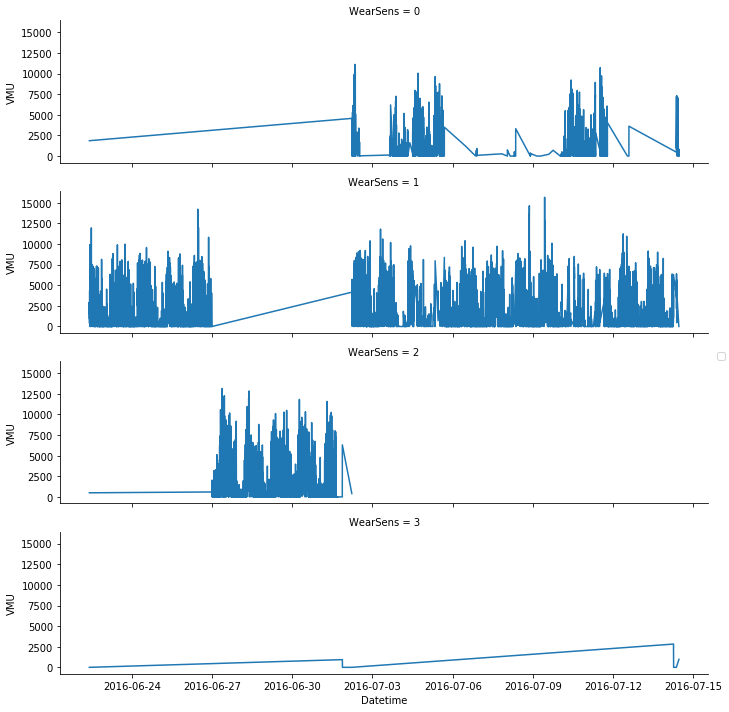

In [24]:
grid = snb.FacetGrid(pt_df, row='WearSens', size = 2.5, aspect = 4)
grid.map(plt.plot, 'Datetime','VMU')
grid.add_legend();

## Plot XCnt, Steps, and VMU for the Patient

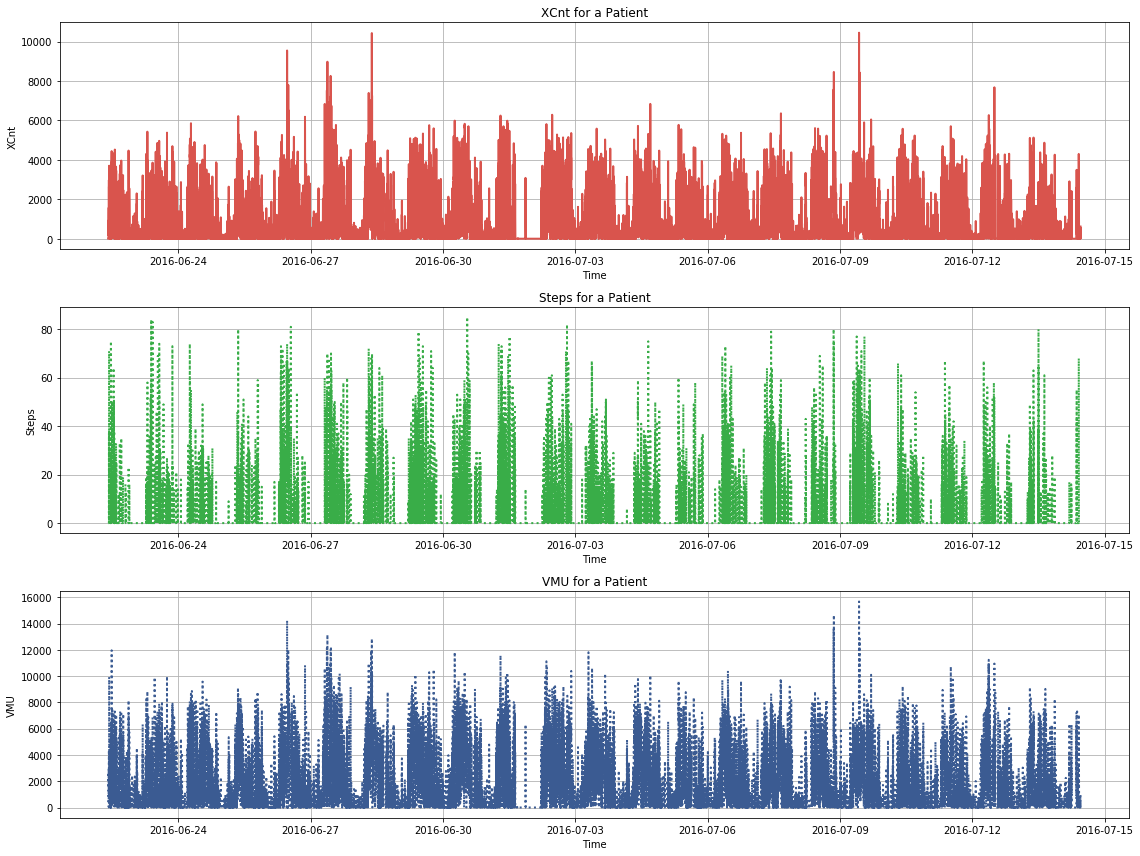

In [25]:
plt.figure(figsize = (16, 12))

plt.subplot(311)
plt.plot(pt_df.Datetime, pt_df.XCnt, color = snb.xkcd_rgb["pale red"],\
         linestyle = '-', lw=2)

plt.xlabel('Time')
plt.ylabel('XCnt')
plt.title('XCnt for a Patient')
plt.grid(True)

plt.subplot(312)
plt.plot(pt_df.Datetime, pt_df.Steps, snb.xkcd_rgb["medium green"], \
         linestyle = ":", lw=2)

plt.xlabel('Time')
plt.ylabel('Steps')
plt.title('Steps for a Patient')
plt.grid(True)

plt.subplot(313)
plt.plot(pt_df.Datetime, pt_df.VMU, snb.xkcd_rgb["denim blue"], \
         linestyle=":", lw=2)

plt.xlabel('Time')
plt.ylabel('VMU')
plt.title('VMU for a Patient')
plt.grid(True)

plt.tight_layout()
plt.show()

## Extract and Plot 4 Days Data for the Patient

In [26]:
pt_df_4days = pt_df[pt_df['Datetime'] >= '06/24/2016']

In [27]:
pt_df_4days = pt_df_4days[pt_df_4days.Datetime <= '06/27/2016']

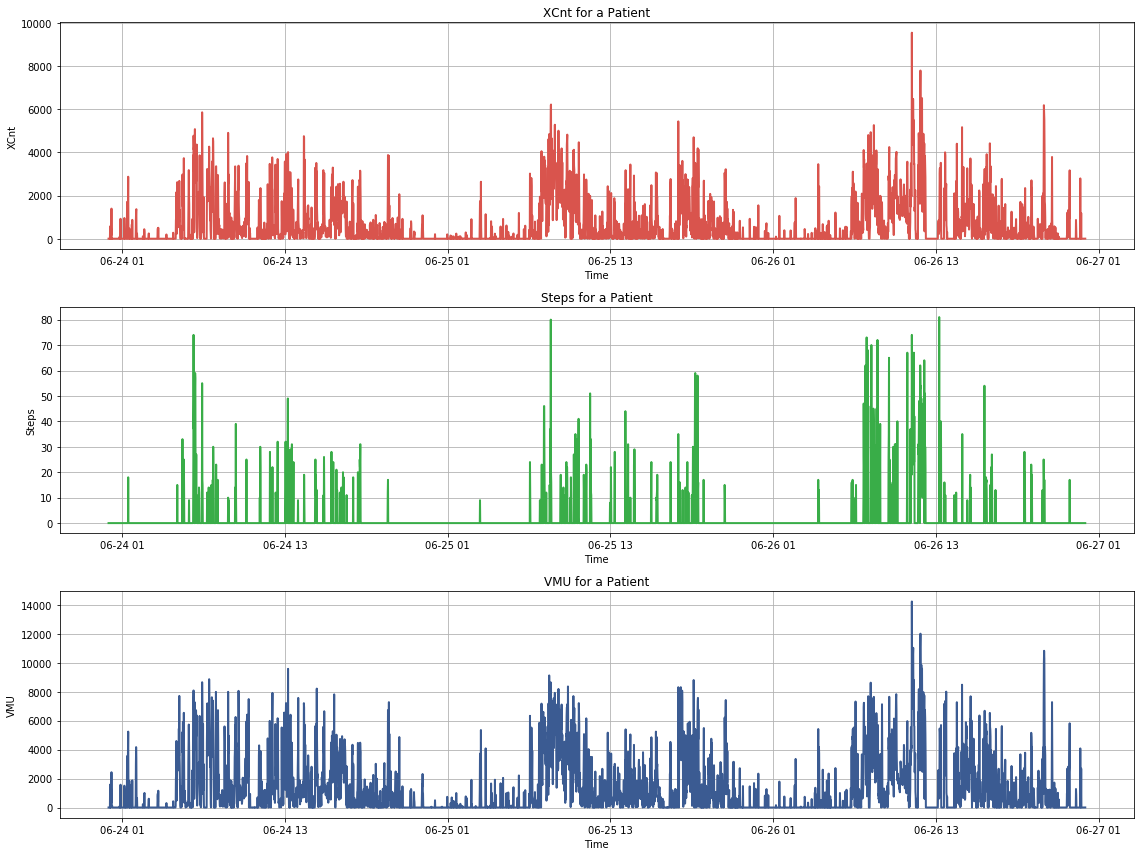

In [28]:
plt.figure(figsize = (16, 12))

plt.subplot(311)
plt.plot(pt_df_4days.Datetime, pt_df_4days.XCnt, snb.xkcd_rgb["pale red"], \
         linestyle='-', lw=2)

plt.xlabel('Time')
plt.ylabel('XCnt')
plt.title('XCnt for a Patient')
plt.grid(True)

plt.subplot(312)
plt.plot(pt_df_4days.Datetime, pt_df_4days.Steps, snb.xkcd_rgb["medium green"],\
         linestyle='-', lw=2)

plt.xlabel('Time')
plt.ylabel('Steps')
plt.title('Steps for a Patient')
plt.grid(True)

plt.subplot(313)
plt.plot(pt_df_4days.Datetime, pt_df_4days.VMU, snb.xkcd_rgb["denim blue"],\
         linestyle='-', lw=2)

plt.xlabel('Time')
plt.ylabel('VMU')
plt.title('VMU for a Patient')
plt.grid(True)

plt.tight_layout()
plt.show()

## Plot Hourly and Daily Averages for the Patient

In [29]:
pt_df.index = pt_df['Datetime']
pt_df.head()

,Uid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,,,
2016-06-22 09:56:00,1,2016-06-22 09:56:00,06/22/2016,1.0,1.0,9:56:00,9,56,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 09:57:00,1,2016-06-22 09:57:00,06/22/2016,1.0,1.0,9:57:00,9,57,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 09:58:00,1,2016-06-22 09:58:00,06/22/2016,1.0,1.0,9:58:00,9,58,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 09:59:00,1,2016-06-22 09:59:00,06/22/2016,1.0,1.0,9:59:00,9,59,0,NaN,0,0,0,0.0,0.0,True,3
2016-06-22 10:00:00,1,2016-06-22 10:00:00,06/22/2016,1.0,1.0,10:00:00,10,0,0,NaN,0,0,0,0.0,0.0,True,3


### Plot Hourly and Daily Average for XCnt

In [30]:
pt_xcnt = pt_df['XCnt']

In [31]:
pt_xcnt_days = pt_xcnt.resample('D').mean()
datestring = lambda d: d.strftime('%m/%d/%y')
xlabs = pt_xcnt_days.index.strftime('%m/%d/%y')
xlabs

array(['06/22/16', '06/23/16', '06/24/16', '06/25/16', '06/26/16',
       '06/27/16', '06/28/16', '06/29/16', '06/30/16', '07/01/16',
       '07/02/16', '07/03/16', '07/04/16', '07/05/16', '07/06/16',
       '07/07/16', '07/08/16', '07/09/16', '07/10/16', '07/11/16',
       '07/12/16', '07/13/16', '07/14/16'], dtype='<U8')

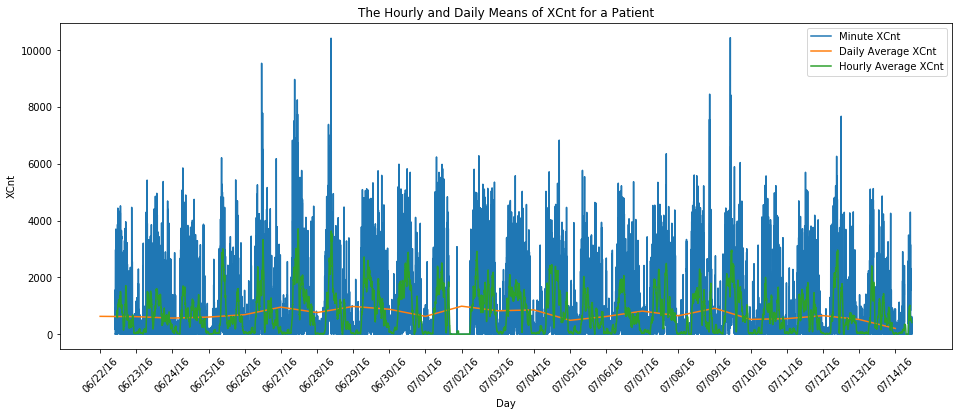

In [32]:
plt.figure(figsize=[16, 6])
plt.plot(pt_xcnt, label="Minute XCnt")
plt.plot(pt_xcnt_days, label="Daily Average XCnt")
plt.plot(pt_xcnt.rolling(60).mean(), label="Hourly Average XCnt")
plt.xticks(xlabs, xlabs, rotation=45)
plt.xlabel("Day")
plt.ylabel("XCnt")
plt.title("The Hourly and Daily Means of XCnt for a Patient")
plt.legend()
#plt.grid()
plt.show()

### Plot Hourly and Daily Average for Steps

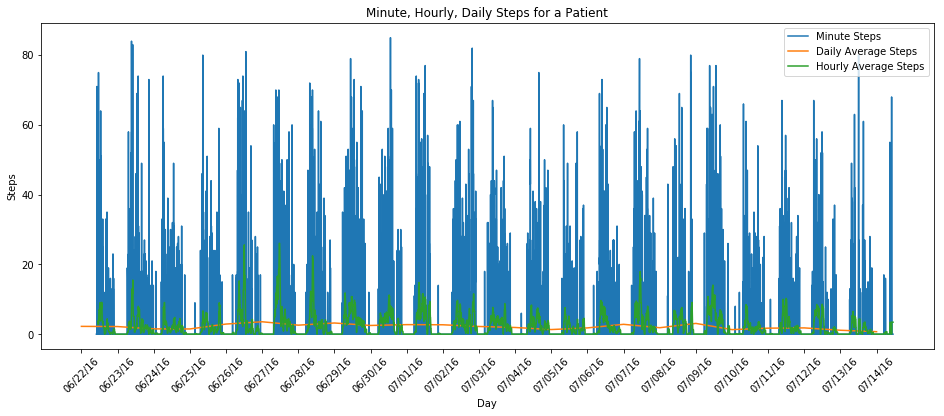

In [33]:
pt_steps = pt_df['Steps']
plt.figure(figsize=[16, 6])
plt.plot(pt_steps, label="Minute Steps")
plt.plot(pt_steps.resample('D').mean(), label="Daily Average Steps")
plt.plot(pt_steps.rolling(60).mean(), label="Hourly Average Steps")
plt.xticks(xlabs, xlabs, rotation=45)
plt.xlabel("Day")
plt.ylabel("Steps")
plt.title("Minute, Hourly, Daily Steps for a Patient")
plt.legend()
#plt.grid()
plt.show()

### Plot Hourly and Daily Means for VMU

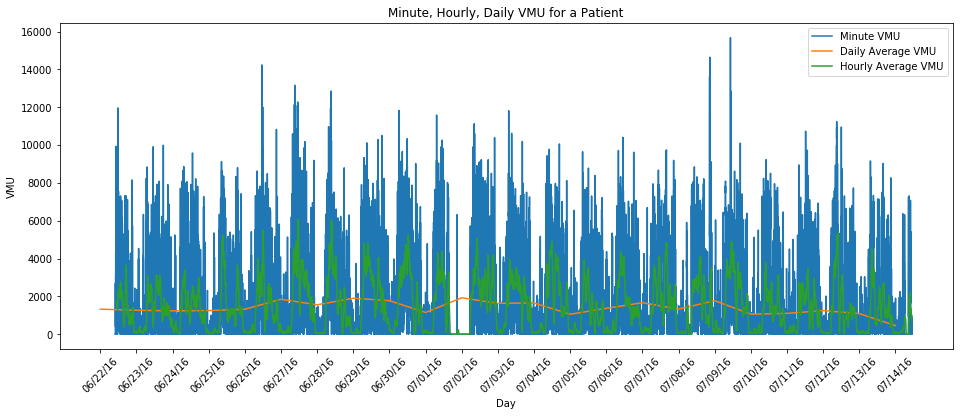

In [34]:
pt_vmu = pt_df['VMU']
plt.figure(figsize=[16, 6])
plt.plot(pt_vmu, label="Minute VMU")
plt.plot(pt_vmu.resample('D').mean(), label="Daily Average VMU")
plt.plot(pt_vmu.rolling(60).mean(), label="Hourly Average VMU")
plt.xticks(xlabs, xlabs, rotation=45)
plt.xlabel("Day")
plt.ylabel("VMU")
plt.title("Minute, Hourly, Daily VMU for a Patient")
plt.legend()
#plt.grid()
plt.show()

## Create Daily Average Steps Table for 183 Patients

#### Each column is a patient's Daily Average Steps.

In [35]:
ids = actiGraph_df['Uid'].unique()

In [36]:
id2Steps = {}
steps_lens = []
for id in ids:    
    steps_list = actiGraph_df[actiGraph_df['Uid'] == id][['Datetime', 'Steps']] \
        .set_index('Datetime').resample('D').mean()
    id2Steps[id] = steps_list
    steps_lens.append(steps_list.count())

In [37]:
np.max(steps_lens)

37

In [38]:
np.min(steps_lens)

1

## Create Daily Average VMU Table for 183 Patients

In [39]:
id2vmu = {}
vmu_lens = []
for id in ids:    
    vmu_list = actiGraph_df[actiGraph_df['Uid'] == id][['Datetime', 'VMU']] \
        .set_index('Datetime').resample('D').mean()
    id2vmu[id] = vmu_list
    vmu_lens.append(vmu_list.count())

In [40]:
np.max(vmu_lens)

37

In [41]:
np.min(vmu_lens)

1

# Clutersing the 183 Patients Using Their Daily Steps Average

In [42]:
from sklearn.cluster import KMeans
from sklearn import metrics

In [43]:
# Create a numpy array for the 183 patients' daily steps data
ids = []
indxs = []
daily_steps = np.zeros((183, 20), dtype = np.float32)
count = 0
for indx, id in enumerate(id2Steps.keys()):
    steps = id2Steps[id]
    if steps.shape[0] >= 22 and sum(steps['Steps'].isnull()) == 0:
        ids.append(id)
        indxs.append(indx)
        daily_steps[count] = np.array(steps['Steps'][1:21])
        count += 1

In [44]:
# How patients with more than 20 days measurements
sum([1 for i in range(daily_steps.shape[0]) if sum(daily_steps[i]) >0])

159

In [45]:
# Compute K-Means
X = daily_steps[:159]
clust = KMeans(n_clusters=3)
km = clust.fit(X)
steps_cluster_centers = km.cluster_centers_
steps_labels = km.labels_

n_clusters_ = len(steps_cluster_centers)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


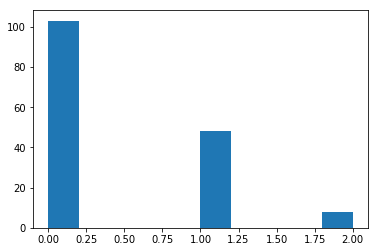

In [46]:
plt.hist(steps_labels)
#plt.grid()
plt.show()

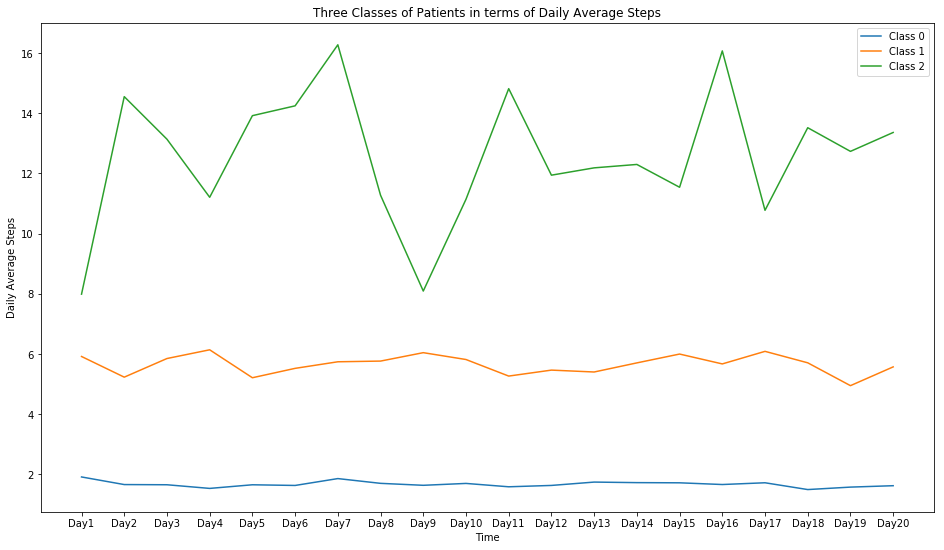

In [47]:
#import matplotlib.pyplot as plt
x_time = np.arange(1, 21)
plt.figure(figsize=(16,9))
for i in range(len(steps_cluster_centers)):
    plt.plot(x_time, steps_cluster_centers[i], label="Class " + str(i))
plt.legend()
plt.title("Three Classes of Patients in terms of Daily Average Steps")
plt.xlabel("Time")
plt.ylabel("Daily Average Steps")
ticks = ["Day" + str(i) for i in x_time]
plt.xticks(x_time, ticks)
plt.yticks(range(2, 18, 2))
#plt.grid()
plt.show()

# Clutersing the 183 Patients Using Their Daily VMU Average

In [48]:
# Create a numpy array for the 183 patients' daily VMU data
ids = []
indxs = []
daily_vmu = np.zeros((183, 20), dtype = np.float32)
count = 0
for indx, id in enumerate(id2vmu.keys()):
    vmu = id2vmu[id]
    if vmu.shape[0] >= 22 and sum(vmu['VMU'].isnull()) == 0:
        ids.append(id)
        indxs.append(indx)
        daily_vmu[count] = np.array(vmu['VMU'][1:21])
        count += 1

In [49]:
# How patients with more than 20 days measurements
sum([1 for i in range(daily_vmu.shape[0]) if sum(daily_vmu[i]) >0])

159

In [50]:
# Compute K-Means
X = daily_vmu[:159]
clust = KMeans(n_clusters=3)
km = clust.fit(X)
vmu_cluster_centers = km.cluster_centers_
vmu_labels = km.labels_

n_clusters_ = len(vmu_cluster_centers)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


(array([63.,  0.,  0.,  0.,  0., 65.,  0.,  0.,  0., 31.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <a list of 10 Patch objects>)

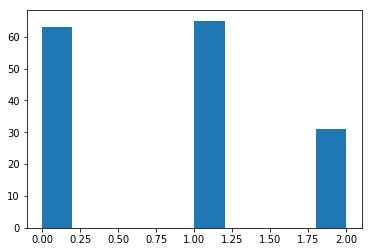

In [51]:
plt.hist(vmu_labels)

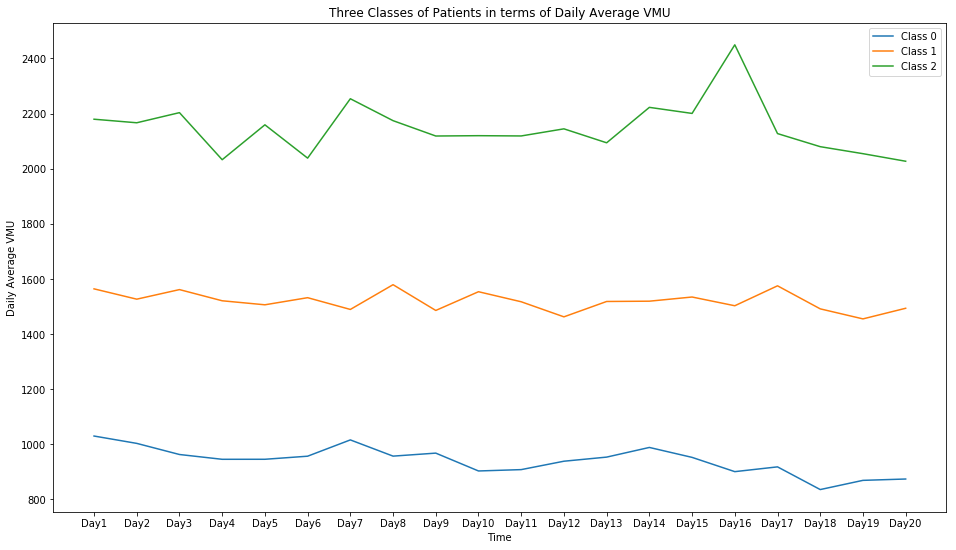

In [52]:
#import matplotlib.pyplot as plt
x_time = np.arange(1, 21)
plt.figure(figsize=(16,9))
for i in range(len(vmu_cluster_centers)):
    plt.plot(x_time, vmu_cluster_centers[i], label="Class " + str(i))
plt.legend()
plt.title("Three Classes of Patients in terms of Daily Average VMU")
plt.xlabel("Time")
plt.ylabel("Daily Average VMU")
ticks = ["Day" + str(i) for i in x_time]
plt.xticks(x_time, ticks)
plt.yticks(range(800, 2600, 200))
#plt.grid()
plt.show()

## Apply tSNE on the 183 Daily Averages of Steps and Plot Them

In [53]:
import time

from sklearn.manifold import TSNE

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
steps_tsne_results = tsne.fit_transform(daily_steps[:159])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.000s...
[t-SNE] Computed neighbors for 159 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 3.485667
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.842495
[t-SNE] Error after 300 iterations: 0.217467
t-SNE done! Time elapsed: 0.9128754138946533 seconds


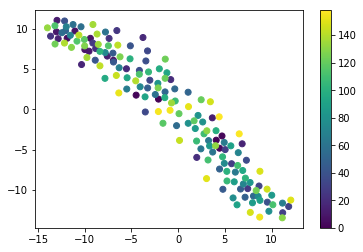

In [54]:
import matplotlib.cm as cm
plt.scatter(steps_tsne_results[:, 0], steps_tsne_results[:, 1], c = range(159), \
            cmap='viridis')
plt.colorbar()

In [55]:
traceTSNE = go.Scatter(
    x = steps_tsne_results[:,0],
    y = steps_tsne_results[:,1],
    name = ids,
    hoveron = ids,
    mode = 'markers',
    text = ids,
    showlegend = True,
    marker = dict(
        size = 8,
        color = steps_labels,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'The Clusters of Patients Based on Daily Averages of Steps)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
#py.iplot(fig, filename='styled-scatter')
py.iplot(fig)

## Apply tSNE on the 183 Daily Averages of VMU and Plot Them

In [56]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
vmu_tsne_results = tsne.fit_transform(daily_vmu[:159])

print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 159 samples in 0.000s...
[t-SNE] Computed neighbors for 159 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 159 / 159
[t-SNE] Mean sigma: 827.294990
[t-SNE] KL divergence after 250 iterations with early exaggeration: 56.816734
[t-SNE] Error after 300 iterations: 0.338246
t-SNE done! Time elapsed: 0.9359076023101807 seconds


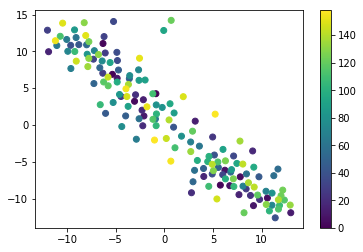

In [57]:
plt.scatter(vmu_tsne_results[:, 0], vmu_tsne_results[:, 1], c = range(159), \
            cmap='viridis')
plt.colorbar()

In [58]:
traceTSNE = go.Scatter(
    x = vmu_tsne_results[:,0],
    y = vmu_tsne_results[:,1],
    name = ids,
    hoveron = ids,
    mode = 'markers',
    text = ids,
    showlegend = True,
    marker = dict(
        size = 8,
        color = vmu_labels,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        opacity = 0.8
    )
)
data = [traceTSNE]

layout = dict(title = 'The Clusters of Patients Based on Daily Averages of VMU)',
              hovermode= 'closest',
              yaxis = dict(zeroline = False),
              xaxis = dict(zeroline = False),
              showlegend= False,

             )

fig = dict(data=data, layout=layout)
#py.iplot(fig, filename='styled-scatter')
py.iplot(fig)

# Automatically Cluster the Patients on Daily Avareage VMU

In [59]:
from sklearn.cluster import AffinityPropagation
X = daily_vmu[:159]
af = AffinityPropagation().fit(X)
cluster_centers_indices = af.cluster_centers_indices_
af_labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 15


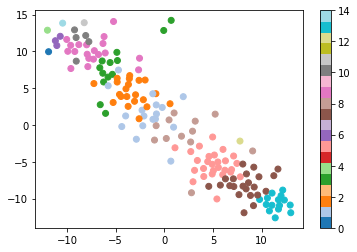

In [60]:
import matplotlib
colors = [int(i % 15) for i in af_labels]
plt.scatter(vmu_tsne_results[:, 0], vmu_tsne_results[:, 1], c = colors, \
           cmap ='tab20')
            
plt.colorbar()

In [61]:
cluster_centers_indices

array([ 16,  19,  22,  28,  30,  50,  63,  69,  79,  83, 125, 130, 136,
       139, 150], dtype=int64)

(array([18., 21., 14., 27.,  3., 34., 19.,  6.,  1., 16.]),
 array([ 0. ,  1.4,  2.8,  4.2,  5.6,  7. ,  8.4,  9.8, 11.2, 12.6, 14. ]),
 <a list of 10 Patch objects>)

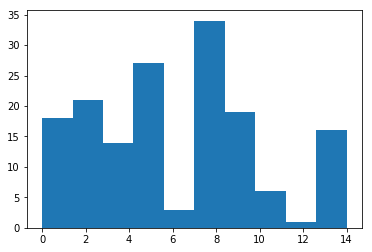

In [62]:
plt.hist(af_labels)

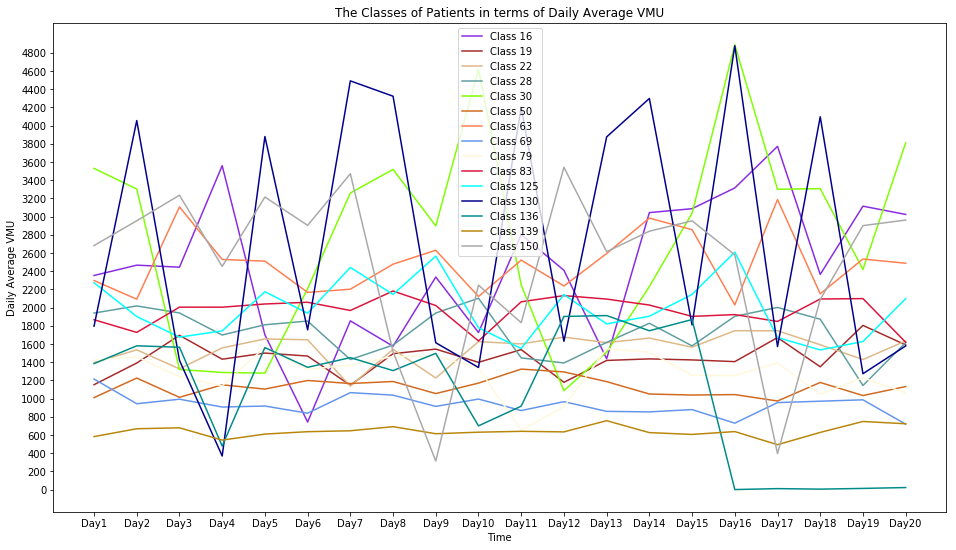

In [63]:
from matplotlib import colors
x_time = np.arange(1, 21)
plt.figure(figsize=(16,9))

colors_list = list(colors.cnames.values())
                   
for i, indx in enumerate(cluster_centers_indices):
    plt.plot(x_time, daily_vmu[indx], label="Class " + str(indx), color=colors_list[i+10])
plt.legend()
plt.title("The Classes of Patients in terms of Daily Average VMU")
plt.xlabel("Time")
plt.ylabel("Daily Average VMU")
ticks = ["Day" + str(i) for i in x_time]
plt.xticks(x_time, ticks)
plt.yticks(range(0, 5000, 200))
#plt.grid()
plt.show()

In [64]:
ids[130]

149

In [65]:
pt2_df = actiGraph_df[actiGraph_df['Uid'] == 149]
pt2_df.index = pt2_df.Datetime
pt2_df.head()

,Uid,Datetime,ACTDT,Day,Week,Time,Hour,Minute,Steps,Lux,YCnt,XCnt,ZCnt,Calories,VMU,Wear,WearSens
Datetime,,,,,,,,,,,,,,,,,
2016-04-28 10:40:00,149,2016-04-28 10:40:00,04/28/2016,1.0,1.0,10:40:00,10,40,3,283.0,2469,2214,1883,5.839712,3813.587025,True,1
2016-04-28 10:41:00,149,2016-04-28 10:41:00,04/28/2016,1.0,1.0,10:41:00,10,41,11,21.0,2703,1943,1941,5.850703,3853.432107,True,1
2016-04-28 10:42:00,149,2016-04-28 10:42:00,04/28/2016,1.0,1.0,10:42:00,10,42,38,0.0,5123,4618,4395,7.048044,8178.452054,True,1
2016-04-28 10:43:00,149,2016-04-28 10:43:00,04/28/2016,1.0,1.0,10:43:00,10,43,57,17.0,4685,4658,3551,6.978684,7500.385990,True,1
2016-04-28 10:44:00,149,2016-04-28 10:44:00,04/28/2016,1.0,1.0,10:44:00,10,44,108,38.0,2461,4523,2033,6.309001,5535.985820,True,1


In [66]:
pt2_df.VMU.resample('D').mean()

Datetime
2016-04-28    1987.066286
2016-04-29    1795.849794
2016-04-30    4054.193298
2016-05-01    1421.057705
2016-05-02     369.597399
2016-05-03    3878.710003
2016-05-04    1755.176256
2016-05-05    4490.237051
2016-05-06    4321.795931
2016-05-07    1613.717636
2016-05-08    1342.264733
2016-05-09    4199.288542
2016-05-10    1629.929579
2016-05-11    3874.801194
2016-05-12    4296.904167
2016-05-13    1809.764612
2016-05-14    4876.292897
2016-05-15    1571.414683
2016-05-16    4095.791940
2016-05-17    1273.444751
2016-05-18    1578.854827
2016-05-19    3726.859181
Freq: D, Name: VMU, dtype: float64

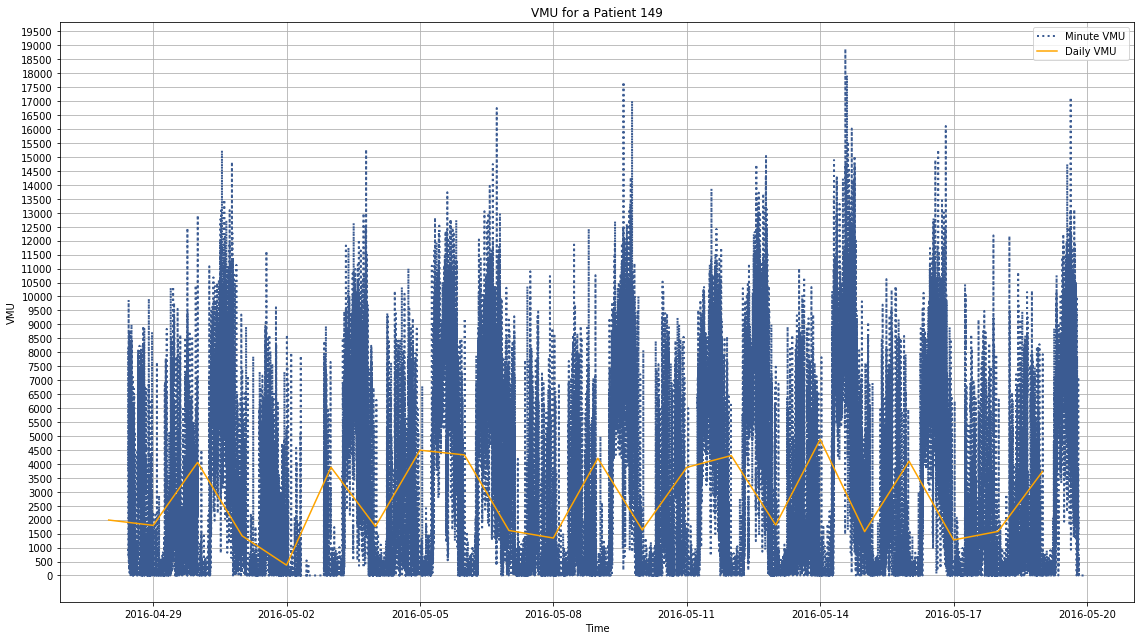

In [67]:
plt.figure(figsize=(16,9))

plt.plot(pt2_df.VMU, snb.xkcd_rgb["denim blue"], \
         linestyle=":", lw=2, label="Minute VMU")
plt.plot(pt2_df.VMU.resample('D').mean(), "orange", label="Daily VMU")

plt.xlabel('Time')
plt.ylabel('VMU')
plt.yticks(range(0, 20000, 500))
plt.title('VMU for a Patient 149')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [68]:
ids[30]

34

In [70]:
pt3_df = actiGraph_df[actiGraph_df['Uid'] == 34]
pt3_df.index = pt3_df.Datetime

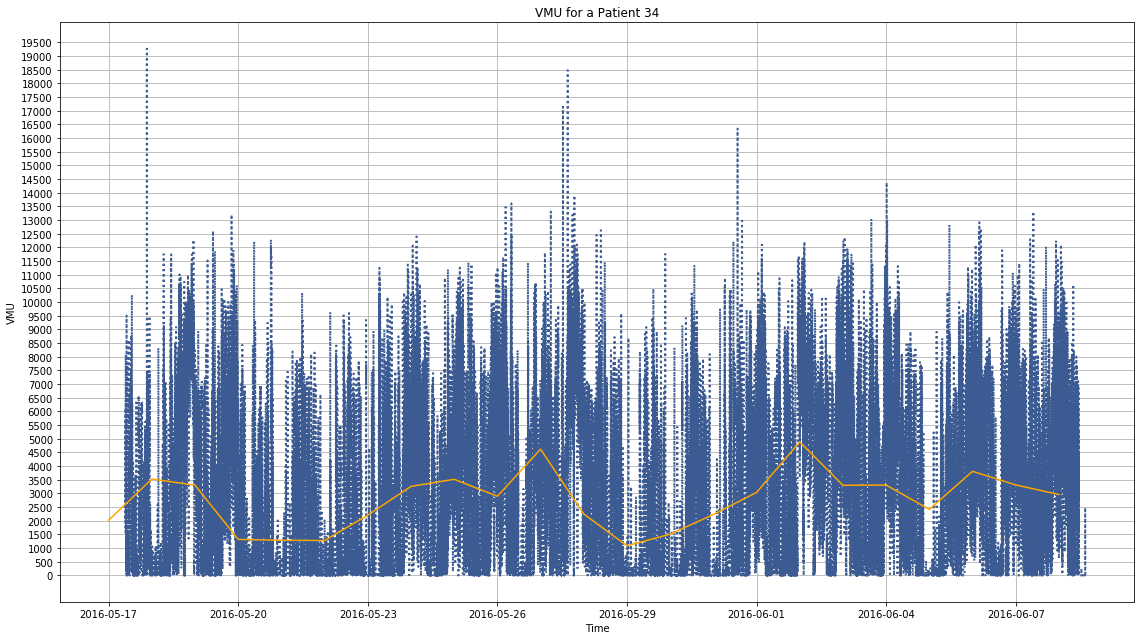

In [71]:
plt.figure(figsize=(16,9))
plt.plot(pt3_df.VMU, snb.xkcd_rgb["denim blue"], \
         linestyle=":", lw=2)
plt.plot(pt3_df.VMU.resample('D').mean(), "orange")
plt.xlabel('Time')
plt.ylabel('VMU')
plt.title('VMU for a Patient 34')
plt.grid(True)
plt.yticks(range(0, 20000, 500))
plt.tight_layout()
plt.show()